<a href="https://colab.research.google.com/github/natanascimento/image-processing/blob/main/notebooks/Atividade_Segmenta%C3%A7%C3%A3o_de_imagens_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download das imagens

In [4]:
!wget https://raw.githubusercontent.com/natanascimento/image-processing/main/assets/vintage-culture.jpg
!wget https://raw.githubusercontent.com/natanascimento/image-processing/main/assets/pedestres.jpg
!wget https://raw.githubusercontent.com/natanascimento/image-processing/main/assets/iphone.jpg

--2022-06-01 18:26:33--  https://raw.githubusercontent.com/natanascimento/image-processing/main/assets/vintage-culture.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67750 (66K) [image/jpeg]
Saving to: ‘vintage-culture.jpg’

vintage-culture.jpg 100%[===================>]  66.16K  --.-KB/s    in 0.007s  

2022-06-01 18:26:33 (8.64 MB/s) - ‘vintage-culture.jpg’ saved [67750/67750]

--2022-06-01 18:26:33--  https://raw.githubusercontent.com/natanascimento/image-processing/main/assets/pedestres.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response..

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.color import rgb2gray, rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

## Questão 1 - Contorno Ativo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


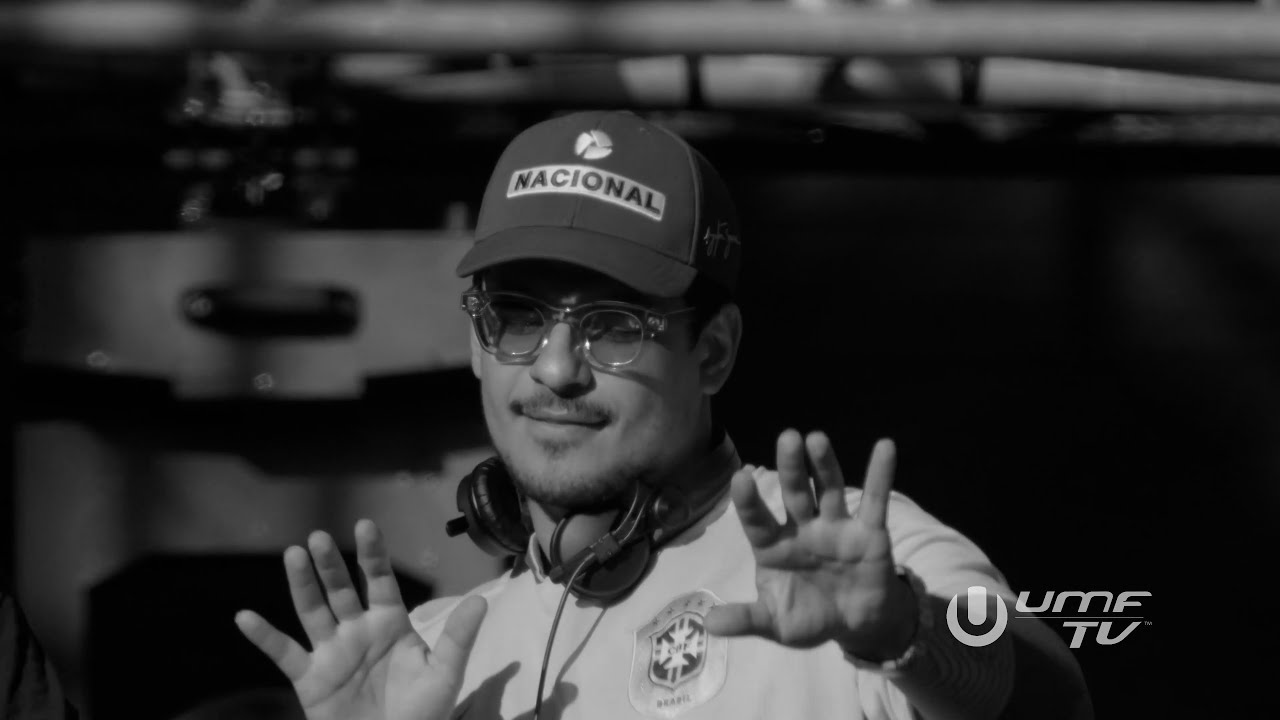

In [6]:
img = cv.imread('/content/vintage-culture.jpg', 0)
img = rgb2gray(img)

cv2_imshow(img)

In [7]:
s = np.linspace(0, 2*np.pi, 600)
r = 350 + 190*np.sin(s)
c = 550 + 200*np.cos(s)

In [8]:
init = np.array([r,c]).T

In [9]:
snake = active_contour(gaussian(img, 3, preserve_range=False), 
                        init, alpha=0.170, beta=0, gamma=0.101)

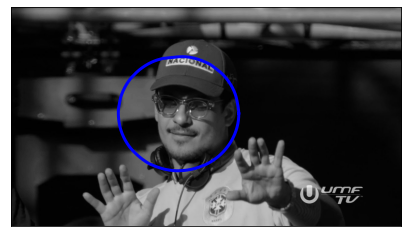

In [10]:
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(img, cmap=plt.cm.gray)

ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)

ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0],0])

plt.show() 

## Questão 2 - Erosão e Dilatação

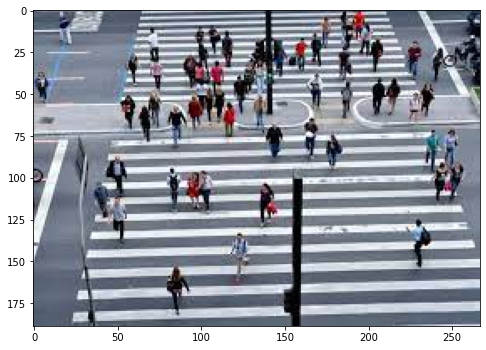

In [11]:
img = cv.imread("/content/pedestres.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(8,10))
plt.imshow(img)

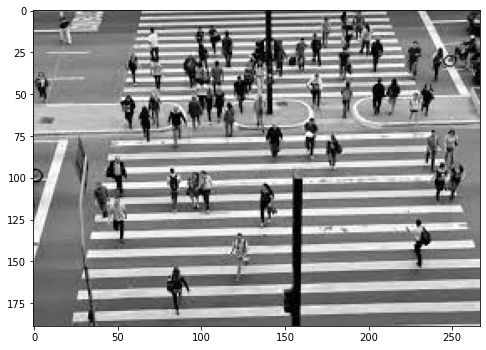

In [12]:
imgGray = cv.imread("/content/pedestres.jpg", cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(8,10))
plt.imshow(imgGray, cmap="gray")

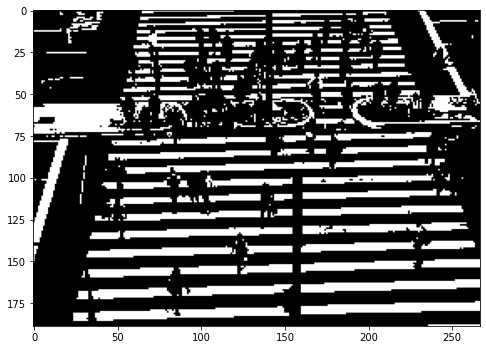

In [13]:
imagemSuavizada = cv.GaussianBlur(imgGray, (1,1),0)
ret,imagemLimiarizada = cv.threshold(imagemSuavizada, 180, 255, cv.THRESH_BINARY)

plt.figure(figsize=(8,10))
plt.imshow(imagemLimiarizada, cmap="gray")

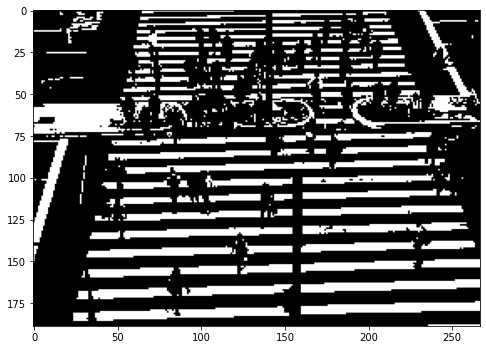

In [14]:
kernel = np.ones((1,1),np.uint8)
imagem_erosao = cv.erode(imagemLimiarizada, kernel, iterations=1)

plt.figure(figsize=(8,10))
plt.imshow(imagem_erosao, cmap="gray")

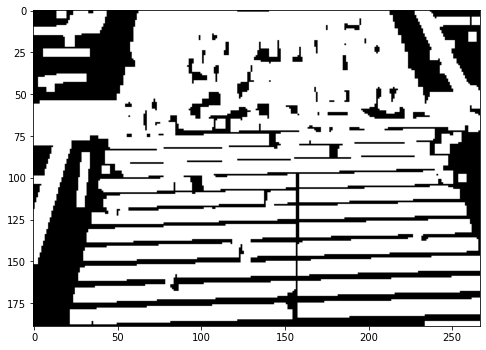

In [15]:
kernel = np.ones((3,3), np.uint8)
imagem_dilatacao = cv.dilate(imagemLimiarizada, kernel, iterations=2)

plt.figure(figsize=(8,10))
plt.imshow(imagem_dilatacao, cmap="gray")

## Questão 3 - Identificação de Objetos e Formas

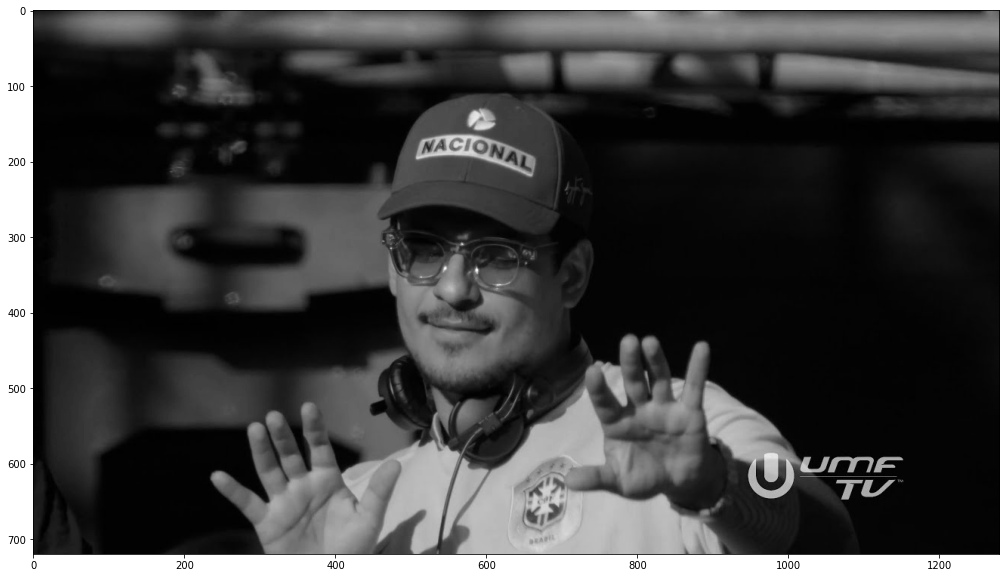

In [16]:
imagem2 = cv.imread("/content/vintage-culture.jpg", cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.imshow(imagem2, cmap='gray')

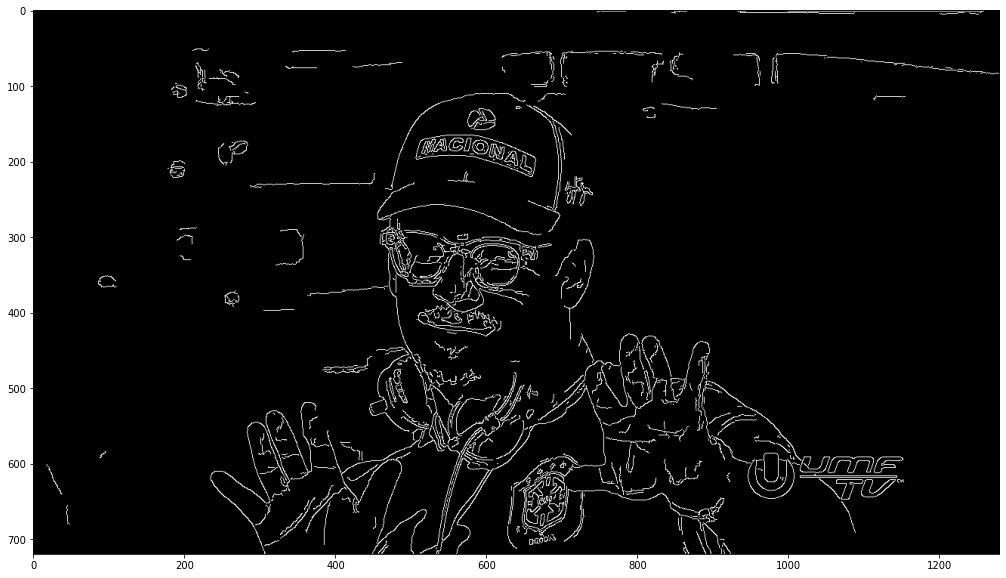

In [17]:
bordaCanny = cv.Canny(imagem2, 40, 80)

plt.figure(figsize=(20,10))
plt.imshow(bordaCanny, cmap = "gray")

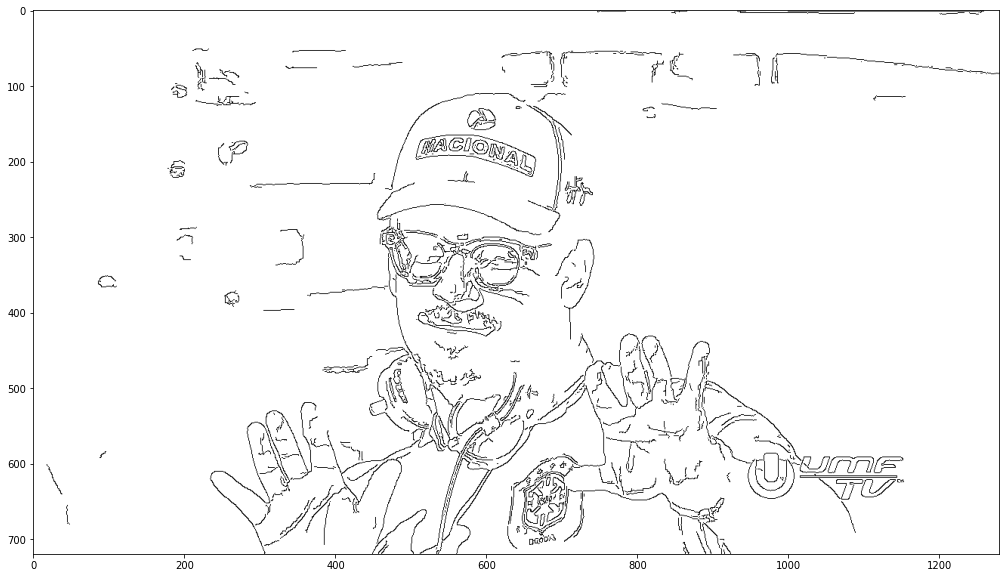

In [18]:
_, mask = cv.threshold(bordaCanny, 30, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize = (20, 10))
plt.imshow(mask, cmap = "gray")

## Identificação de objetos


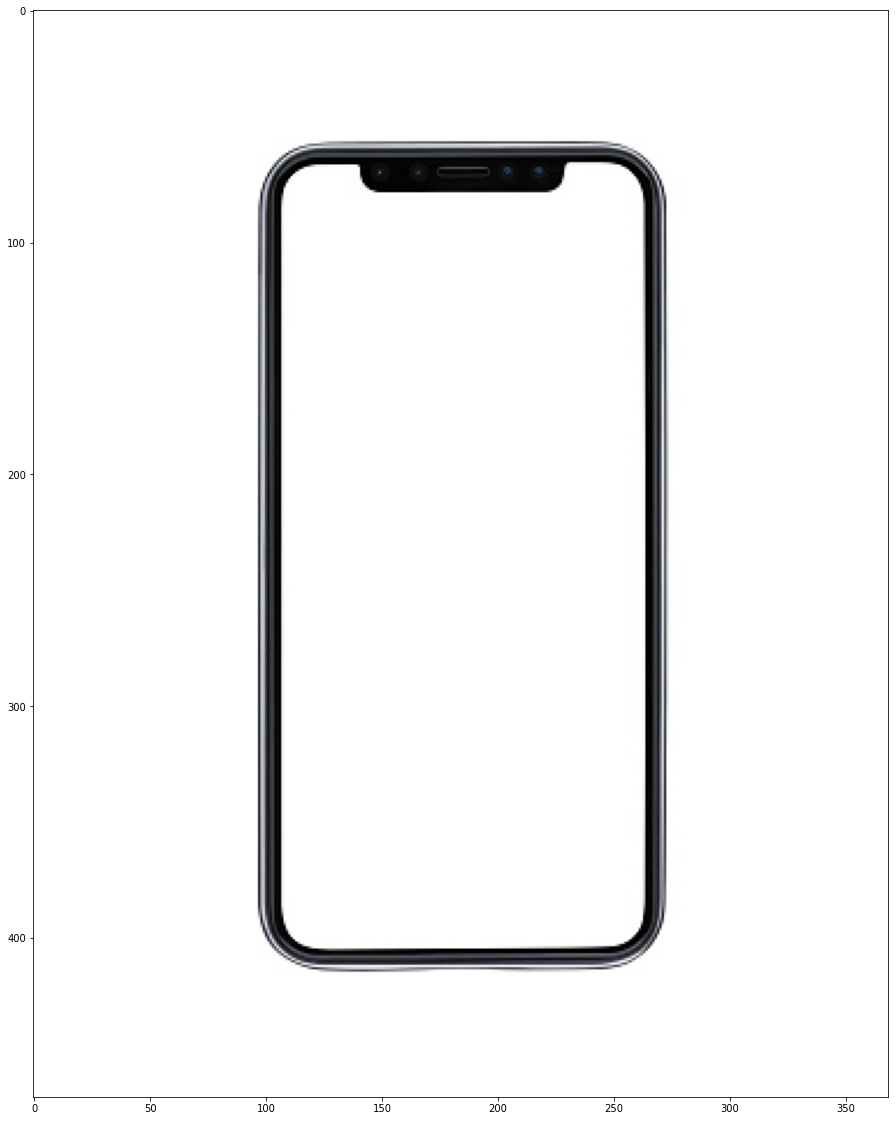

In [19]:
imgObjetos = cv.imread("/content/iphone.jpg")
imgObjetos = cv.cvtColor(imgObjetos, cv.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.imshow(imgObjetos) 

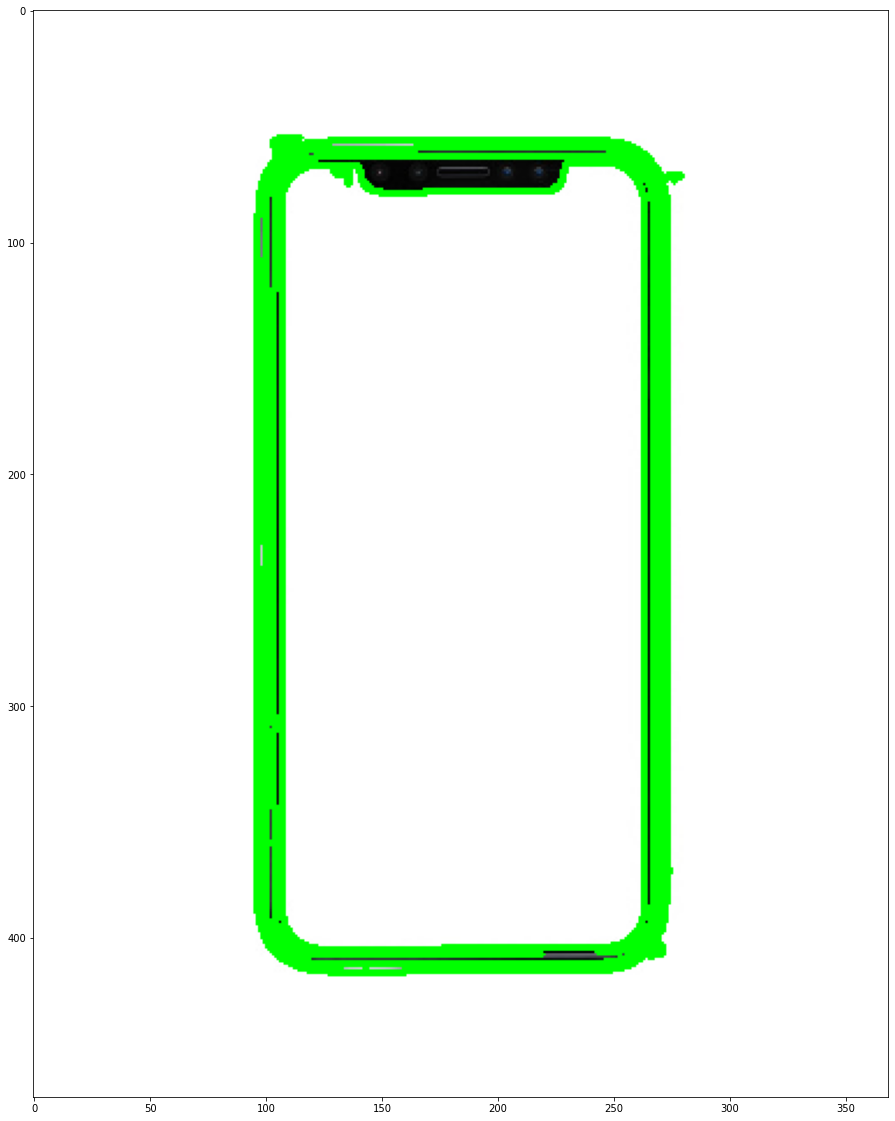

In [20]:
imgObjetosGray = cv.cvtColor(imgObjetos, cv.COLOR_BGR2GRAY)
imgBorda = cv.Canny(imgObjetosGray, 1, 450)

contornosObjetos, hierarquiaObjetos = cv.findContours(imgBorda, cv.RETR_EXTERNAL,
                                                      cv.CHAIN_APPROX_NONE)
imgObjetosContornos = imgObjetosGray.copy()
cv.drawContours(imgObjetosContornos, contornosObjetos, -1, (0, 255, 0), 3)

contornosObjetosInternos, hierarquiaObjetosInternos = cv.findContours(imgBorda, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

imgObjetosContornosInternos = imgObjetos.copy()

cv.drawContours(imgObjetosContornosInternos, contornosObjetosInternos, -1, (0, 255, 0), 2)

plt.figure(figsize = (20, 20))
plt.imshow(imgObjetosContornosInternos)